# **IS4487 Week 7 - Data Transformation**

This notebook is designed to help you follow along with the **Week 7 Lecture and Reading**, introducing you to Python.

The practice code demos are intended to give you a chance to see working code and can be a source for your lap and assignment work. Each section contains short explanations and annotated code that reflect the steps in the reading.

---
### **Topics for this demo:**


*   Normalization and Standardization
*  Variable Creation
* Binning
* Encoding


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Demos/demo_07_data_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
# **Background:**

A regional retail chain wants to improve its monthly sales forecasting for 120 stores across multiple states. The dataset includes historical sales data, product categories, and customer demographics. However, the raw data is inconsistent, incomplete, and difficult to model in its current form.

---
### **Business Task**

The business wants more accurate sales forecasts to improve inventory planning and reduce overstock or stockouts.

 

---
### **Step 1: Import Necessary Python Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


---
### **Step 2: Load Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/c03ec1dee7c453a0762914acdf92b4b7796fe050/DataSets/superstore_retail_orders.csv')

df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active


---
### **Step 3: Inspect data**

In [ ]:
df.shape

(56043, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56043 entries, 0 to 56042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56043 non-null  int64  
 1   order_date        56011 non-null  object 
 2   order_year_month  56011 non-null  object 
 3   customer_name     56043 non-null  object 
 4   city              55569 non-null  object 
 5   state_province    55569 non-null  object 
 6   email             56043 non-null  object 
 7   order_type        56043 non-null  object 
 8   quantity          56004 non-null  float64
 9   product_name      56043 non-null  object 
 10  product_line      56043 non-null  object 
 11  product_price     56043 non-null  float64
 12  product_status    56043 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 5.6+ MB


In [ ]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active


In [ ]:
df.describe()

,order_id,quantity,product_price
count,56043.000000,56004.000000,56043.000000
mean,61668.410578,3.348582,6198.309433
std,7508.142486,422.654112,35784.965255
min,45079.000000,1.000000,2.290000
25%,55644.500000,1.000000,7.950000
50%,61870.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


It's very clear that we will be working with many categorical variables, we must think of what data transformation methods we will use to standardize the data  

---
### **Step 4: Clean Data** (missing values)

little caveat here, unlike last week where we decided to save rows and fill missing values by imputation. We will simply drop missing values becuase our dataset is so large.




In [ ]:
print("Null values by column: \n")
print(df.isnull().sum())

Null values by column: 

order_id              0
order_date           32
order_year_month     32
customer_name         0
city                474
state_province      474
email                 0
order_type            0
quantity             39
product_name          0
product_line          0
product_price         0
product_status        0
dtype: int64


In [ ]:
df = df.dropna()

#double check null values were dropped
print(f"Check for nulls \n", df.isnull().sum())

Check for nulls 
 order_id            0
order_date          0
order_year_month    0
customer_name       0
city                0
state_province      0
email               0
order_type          0
quantity            0
product_name        0
product_line        0
product_price       0
product_status      0
dtype: int64


---
### **Step 4A: Clean Data** (uncessary rows and duplicates)

lets drop unecessary rows like order_id look for duplicates

In [ ]:
#df = df.drop(columns=['order_id'])
print("Count of Duplicate Rows:", df.duplicated().sum())

Count of Duplicate Rows: 0


Get rid of duplicates

In [ ]:
df = df.drop_duplicates()
print("Count of Duplicate Rows:", df.duplicated().sum())

Count of Duplicate Rows: 0


---
### **Step 4B: Clean Data** (convert datatypes)

*We will not be converting product_name and city  into categorical varaibles:


Convert order_date and order_year_month into datetime datatype

In [ ]:
#convert order_date into datetime datatype
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

#convert and format order_year Month into datetime datatype
df['order_year_month'] = pd.to_datetime(df['order_year_month'], format='%Y-%m', errors='coerce').dt.strftime('%Y-%m')


---
Standardize the state_province column

In [ ]:
# First, check what unique values you have
print(df['state_province'].unique())

#We need clean the abbreviations into the state names to standardize things. Use a dictionary
abbreve_name = { 'CA': "California", 'TX': 'Texas', 'NY': 'New York', 'NC': 'North Carolina', 'MA': 'Massachusetts', 'AZ': 'Arizona', 'MI':'Michigan'}

#replace abbreviations with names
df['state_province'] = df['state_province'].replace(abbreve_name)


['New Hampshire' 'West Virginia' 'South Dakota' 'Wisconsin' 'Mississippi'
 'Ohio' 'Alabama' 'Virginia' 'New York' 'Maryland' 'Pennsylvania'
 'Georgia' 'Texas' 'Michigan' 'Kentucky' 'Missouri' 'Massachusetts'
 'Illinois' 'Alaska' 'Nebraska' 'Montana' 'Oregon' 'South Carolina'
 'Louisiana' 'Indiana' 'Nevada' 'Delaware' 'Florida' 'Rhode Island'
 'New Mexico' 'Arkansas' 'Utah' 'Tennessee' 'Oklahoma' 'Arizona'
 'California' 'Vermont' 'Connecticut' 'Idaho' 'Colorado' 'Kansas'
 'Minnesota' 'New Jersey' 'TX' 'Iowa' 'Wyoming' 'Washington' 'Hawaii'
 'North Carolina' 'North Dakota' 'Maine' 'NY' 'Canada' 'MA' 'CA' 'Mexico'
 'NC' 'AZ' 'MI']


---
We have some rows where state_province are Canada and Mexcio. Lets see how many of our rows are Canadian/Mexican orders

In [ ]:
# Show all rows where state_province is exactly 'Mexcio'
mexcio_rows = df[df['state_province'] == 'Mexico']
print("Number of rows with 'Mexico':", len(mexcio_rows))

canada_rows = df[df['state_province'] == 'Canada']
print("Number of rows with 'Canada':", len(canada_rows))

Number of rows with 'Mexico': 20
Number of rows with 'Canada': 18


---
38 rows isn't signicant for this dataset we are going to drop them and then we can convert the state_province column into a catetgorical variable.

Lets check one last time to ensure eveything has been standardized

In [ ]:
#remove rows where state_province is Canada or Mexico
df = df[df['state_province'] != 'Canada']
df = df[df['state_province'] != 'Mexico']

df['state_province'] = df['state_province'].astype('category')

#print(len(df['state_province'].unique()))
df['state_province'].unique()

['New Hampshire', 'West Virginia', 'South Dakota', 'Wisconsin', 'Mississippi', ..., 'Washington', 'Hawaii', 'North Carolina', 'North Dakota', 'Maine']
Length: 50
Categories (50, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington',
                          'West Virginia', 'Wisconsin', 'Wyoming']

---
Convert order_type column into a categorical datatype

In [ ]:
#look for any obvious errors
print(df['order_type'].unique())

#convert columns
df['order_type'] = df['order_type'].astype('category')

['Retail' 'Online']


---
convert product_line into a categorical datatype


In [ ]:
#look for any obvious errors
print(df['product_line'].unique())

#fixing a quick fromatting issue
df['product_line'] = df['product_line'].replace('OfficeProducts', 'Office Products')

#convert into categroical
df['product_line'] = df['product_line'].astype('category')

['Mobile' 'Bikes' 'Cameras' 'Electronics' 'Accessories' 'Clothing'
 'Projector' 'Laptop' 'OfficeProducts']


---
Convert product status into categorical

In [ ]:
#look for erros
print(df['product_status'].unique())

#convert into categroical
df['product_status'] = df['product_status'].astype('category')

['Active' 'Not Active']


---
convert quantity into an integer datatype

In [ ]:
df['quantity'] = df['quantity'].astype('int64')


---
Make sure names are formatted correctly

In [ ]:
# Step 1: Convert to lowercase and strip whitespace
df['customer_name'] = df['customer_name'].str.lower().str.strip()

# Step 2: Remove numbers and symbols, keep only letters and spaces
df['customer_name'] = df['customer_name'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Step 3: Clean up multiple spaces (replace multiple spaces with single space)
df['customer_name'] = df['customer_name'].str.replace(r'\s+', ' ', regex=True)

# Step 4: Strip again to remove any leading/trailing spaces after cleaning
df['customer_name'] = df['customer_name'].str.strip()



---
make sure we have converted the varibles to their proper datatypes

In [ ]:
#Check to see if everything is converted

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55460 entries, 0 to 56042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          55460 non-null  int64         
 1   order_date        55405 non-null  datetime64[ns]
 2   order_year_month  55405 non-null  object        
 3   customer_name     55460 non-null  object        
 4   city              55460 non-null  object        
 5   state_province    55460 non-null  category      
 6   email             55460 non-null  object        
 7   order_type        55460 non-null  category      
 8   quantity          55460 non-null  int64         
 9   product_name      55460 non-null  object        
 10  product_line      55460 non-null  category      
 11  product_price     55460 non-null  float64       
 12  product_status    55460 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 

---
# **Step 5: Standardize Numeric values**

---
### **Step 5A: clean up quantity**
Lets clear out obvious outliers

When using df.describe() we had a Max for quanity of 100,000 which is most likely an erro. Furthermore we can see from the descriptive statistics that orders <=2 are in the 75th percentile.  

In [ ]:
print("Quantity stats:\n", df['quantity'].describe())

# Show top 5 largest orders
print("\nTop quantities:")
print(df.nlargest(10, 'quantity')[['quantity','product_name', 'customer_name', 'product_price']])


Quantity stats:
 count     55460.000000
mean          3.366462
std         424.721927
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      100000.000000
Name: quantity, dtype: float64

Top quantities:
       quantity                                       product_name  \
33822    100000                              Water Bottle - 30 oz.   
55308      2000  Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...   
44626       600                                Projector Black, 44   
45857       500                               Gaming Laptop Silver   
33727       200                              Water Bottle - 30 oz.   
45530       100                                      Gaming Laptop   
45752        20                                Gaming Laptop Matte   
2             5  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...   
1             4  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...   
0             3  Apple iPhone XR (Yellow, 256 GB) (

Customers buying one hundred thousand water bottles seems unreasonable.

Buying 2000 phones seems unreasonable

Buying 600 projectors seems unreasonable

etc.

We will filter quantitiy withing the IQR to standardize our data

In [ ]:
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['quantity'] >= Q1 - 1.5*IQR) & (df['quantity'] <= Q3 + 1.5*IQR)]


In [ ]:
df.describe()

,order_id,order_date,quantity,product_price
count,55451.000000,55396,55451.000000,55451.000000
mean,61674.590161,2023-11-10 19:42:40.733626624,1.501776,6224.351959
min,45079.000000,1922-06-28 00:00:00,1.000000,2.290000
25%,55659.500000,2023-10-06 00:00:00,1.000000,7.950000
50%,61886.000000,2024-01-11 00:00:00,1.000000,475.600000
75%,68085.500000,2024-04-11 00:00:00,2.000000,914.620000
max,74147.000000,2029-08-02 00:00:00,3.000000,235481.000000
std,7500.164238,NaN,0.612326,35865.167552


---
### **Step 5B: clean up product_price**
No lets fix the product_price column using the same methods

In [ ]:
print("price stats:\n", df['product_price'].describe())

# Show top 5 largest orders
print("\nTop quantities:")
print(df.nlargest(5, 'product_price')[['product_name', 'product_price']])

price stats:
 count     55451.000000
mean       6224.351959
std       35865.167552
min           2.290000
25%           7.950000
50%         475.600000
75%         914.620000
max      235481.000000
Name: product_price, dtype: float64

Top quantities:
                product_name  product_price
36546  Half-Finger Gloves, L       235481.0
36547  Half-Finger Gloves, L       235481.0
36548  Half-Finger Gloves, L       235481.0
36549  Half-Finger Gloves, L       235481.0
36550  Half-Finger Gloves, L       235481.0


Half finger gloves for 235,481 is clearly an error, from our previous analysis of quantitiy the most expensive item that was realistic was the gaming laptop for about $3,578.27. We will remove values where price >=5,000

In [ ]:
df = df[df['product_price'] <= 5000]


In [ ]:
df.describe()

,order_id,order_date,quantity,product_price
count,54127.000000,54072,54127.000000,54127.000000
mean,61643.344172,2023-11-10 08:42:55.765645568,1.489977,616.507408
min,45079.000000,1922-06-28 00:00:00,1.000000,2.290000
25%,55624.000000,2023-10-06 00:00:00,1.000000,7.950000
50%,61857.000000,2024-01-10 00:00:00,1.000000,475.600000
75%,68061.500000,2024-04-11 00:00:00,2.000000,914.620000
max,74147.000000,2029-08-02 00:00:00,3.000000,3578.270000
std,7516.596609,NaN,0.609819,816.913765


---
### **5C: Cleaning up order_date**

Using df.describe() we saw a minimum year of 1922 and a maximum year of 2029. Lets clean out erroneous dates


In [ ]:
# Define valid range (adjust as needed for your dataset)
start_date = "2020-01-01"
end_date   = "2025-12-31"

# Filter rows within the valid range
df = df[(df['order_date'] >= start_date) & (df['order_date'] <= end_date)]


In [ ]:
df.describe()


,order_id,order_date,quantity,product_price
count,53926.000000,53926,53926.000000,53926.000000
mean,61617.312206,2023-12-16 01:47:14.417534976,1.489764,616.902464
min,45079.000000,2022-01-01 00:00:00,1.000000,2.290000
25%,55626.000000,2023-10-06 00:00:00,1.000000,7.950000
50%,61841.500000,2024-01-10 00:00:00,1.000000,475.600000
75%,68018.750000,2024-04-10 00:00:00,2.000000,914.620000
max,74146.000000,2024-06-30 00:00:00,3.000000,3578.270000
std,7498.972670,NaN,0.609671,817.330327


# **Step 6: Feature Engineering**

In [ ]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status
0,51188,2023-07-01,2023-07,audrey blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
3,51241,2023-07-04,2023-07,alexa bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
4,51297,2023-07-08,2023-07,casey diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
5,51319,2023-07-09,2023-07,troy rodriguez,South Brendamouth,Ohio,troy_rodriguez@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active
6,51357,2023-07-11,2023-07,natalie phillips,Rachelburgh,Alabama,natalie_phillips@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active


---
### **Step 6A: Create season column**




In [ ]:
#function to determine what season an order is in
def get_season(date):
    month = date.month
    if month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    elif month in [12, 1, 2]:
        return "Winter"
    else:
        return "Spring"

# Convert 'order_year_month' to datetime objects before applying the function
df['order_year_month'] = pd.to_datetime(df['order_year_month'])

df['season'] = df['order_year_month'].apply(get_season)

#convert the new season column into a categorical datatype
df['season'] = df['season'].astype('category')

---
### **Step 6B: Create Revenue column**

In [ ]:
df["revenue"] = df["quantity"] * df["product_price"]

---
### **Step 6B: Create high value order column**

In [ ]:
# Use median revenue as the cutoff
cutoff = df['revenue'].median()

# Create Yes/No column for high value orders
df['high_value_order'] = np.where(df['revenue'] > cutoff, "Yes", "No")

#convert high value order into categorical datatype
df['high_value_order'] = df['high_value_order'].astype('category')

In [ ]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,season,revenue,high_value_order
0,51188,2023-07-01,2023-07-01,audrey blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,Summer,1949.97,Yes
3,51241,2023-07-04,2023-07-01,alexa bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,Summer,649.99,Yes
4,51297,2023-07-08,2023-07-01,casey diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,Summer,649.99,Yes
5,51319,2023-07-09,2023-07-01,troy rodriguez,South Brendamouth,Ohio,troy_rodriguez@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,Summer,649.99,Yes
6,51357,2023-07-11,2023-07-01,natalie phillips,Rachelburgh,Alabama,natalie_phillips@email.com,Online,1,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,Summer,649.99,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53926 entries, 0 to 56042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          53926 non-null  int64         
 1   order_date        53926 non-null  datetime64[ns]
 2   order_year_month  53926 non-null  datetime64[ns]
 3   customer_name     53926 non-null  object        
 4   city              53926 non-null  object        
 5   state_province    53926 non-null  category      
 6   email             53926 non-null  object        
 7   order_type        53926 non-null  category      
 8   quantity          53926 non-null  int64         
 9   product_name      53926 non-null  object        
 10  product_line      53926 non-null  category      
 11  product_price     53926 non-null  float64       
 12  product_status    53926 non-null  category      
 13  season            53926 non-null  category      
 14  revenue           53926 non

---
# **Step 7: Encode categories of interest**

For this example we will one hot encode season and binary encode order type to use for comparing online vs retail sales

You could do much more encoding but for our purposes we will keep things simple





---
### **Step 7A: One-Hot-encode season**

In [ ]:
# Encode season into dummy variables
df = pd.get_dummies(df, columns=['season'], drop_first=False)

# Creates: season_Fall, season_Winter, season_Spring, season_Summer
print(df.filter(like='season').head())


   season_Fall  season_Spring  season_Summer  season_Winter
0        False          False           True          False
3        False          False           True          False
4        False          False           True          False
5        False          False           True          False
6        False          False           True          False


---
### **Step 7B: encode order_type**

In [ ]:
# This column was already encoded in a previous step.
# df['order_type'] = df['order_type'].astype(str)

df = pd.get_dummies(df, columns=['order_type'], drop_first=False)
print(df.filter(like='order_type').head())

   order_type_Online  order_type_Retail
0              False               True
3               True              False
4               True              False
5               True              False
6               True              False


# **Step 8: Binning**

We will bin year to compare revenue for different years

In [ ]:
# Extract year if not already separate
df['year'] = df['order_date'].dt.year

# Bin years into groups (example: 2022, 2023, 2024)
bins = [2021, 2022, 2023, 2024, 2025]
labels = ['2022', '2023', '2024', '2025']
df['year_bin'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

print(df[['year', 'year_bin']].head())


   year year_bin
0  2023     2024
3  2023     2024
4  2023     2024
5  2023     2024
6  2023     2024


# **Step 8: Graph relationships**

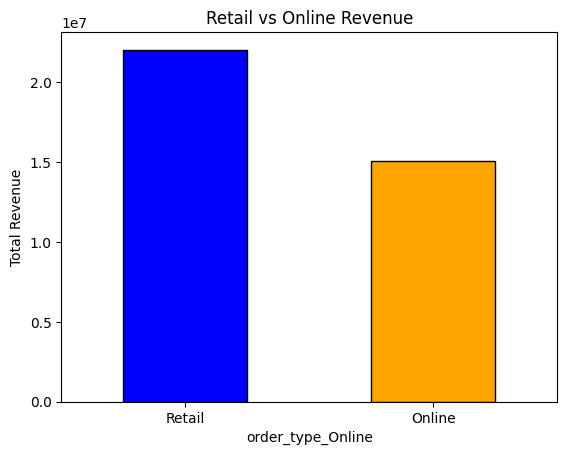

In [ ]:
import matplotlib.pyplot as plt

df.groupby('order_type_Online')['revenue'].sum().plot(
    kind='bar', color=['blue', 'orange'], edgecolor='black'
)
plt.xticks([0,1], ['Retail', 'Online'], rotation=0)
plt.ylabel("Total Revenue")
plt.title("Retail vs Online Revenue")
plt.show()


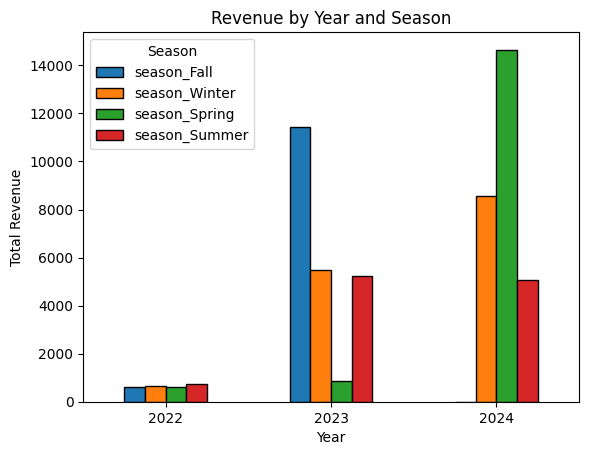

In [ ]:
# Sum revenue by year and dummy season columns
season_rev = df.groupby('year')[['season_Fall','season_Winter','season_Spring','season_Summer']].sum()

# Plot grouped bar chart
season_rev.plot(kind='bar', edgecolor='black')

plt.title("Revenue by Year and Season")
plt.ylabel("Total Revenue")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title="Season")
plt.show()


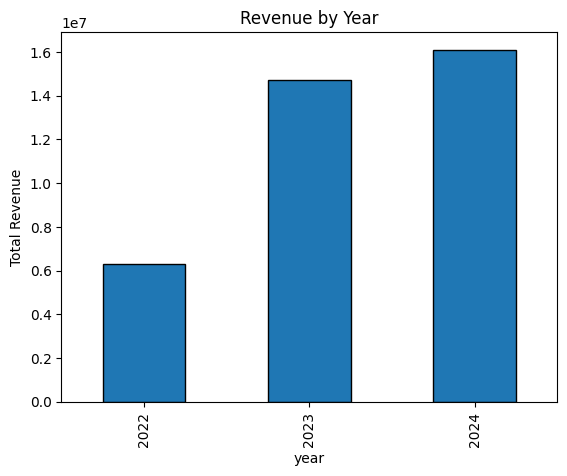

In [ ]:
df.groupby('year')['revenue'].sum().plot(kind='bar', edgecolor='black')
plt.ylabel("Total Revenue")
plt.title("Revenue by Year")
plt.show()
